In [33]:
import shap
import xgboost as xgb
import pandas as pd
import numpy as np
df_n=pd.read_csv("mw_pw_profiles.csv")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 

/var/folders/_w/hzx2gf556w1dq5_ps720t3lw0000gn/T/ipykernel_29018/3662230818.py:5: DtypeWarning: Columns (32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_n=pd.read_csv("mw_pw_profiles.csv")


In [34]:
df = df_n.dropna(axis=1, how='all')

z= df[df['match_type'] == "ODM"]
X = z[['catches_taken','run_out_direct', 'run_out_throw', 'stumpings_done','balls_bowled', 'runs_conceded','wickets_taken', 'bowled_done', 'lbw_done', 'maidens','dot_balls_as_bowler']].values
y = z['fantasy_score_bowling'].values
z.head()

,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,player_out,...,key_nvplay,key_nvplay_2,key_opta,key_opta_2,key_pulse,key_pulse_2,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
34,00321fff,1174839,male,6,2019-04-24,ICC World Cricket League Division Two,ODM,Mohammad Ghazanfar,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,0,0
35,00321fff,1174843,male,6,2019-04-27,ICC World Cricket League Division Two,ODM,Mohammad Ghazanfar,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],6,25,31
41,00321fff,1317951,male,6,2022-06-18,CWC Challenge League,ODM,Mohammad Ghazanfar,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],2,62,64
42,00321fff,1317954,male,6,2022-06-20,CWC Challenge League,ODM,Mohammad Ghazanfar,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,4,4
48,00321fff,1326865,male,6,2022-08-10,CWC Challenge League,ODM,Mohammad Ghazanfar,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,0,0


In [35]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(n_estimators=100, max_depth=6, random_state=42)
model.fit(X_train, y_train)

#Model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # Now this will work
r2 = r2_score(y_test, y_pred)
print(f"Model Performance:")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


explainer = shap.Explainer(model, sampled_X)

shap_values = explainer(sampled_X)

print("Creating Visualizations ")

Model Performance:
MSE: 0.5572
R²: 0.9994
Creating Visualizations 


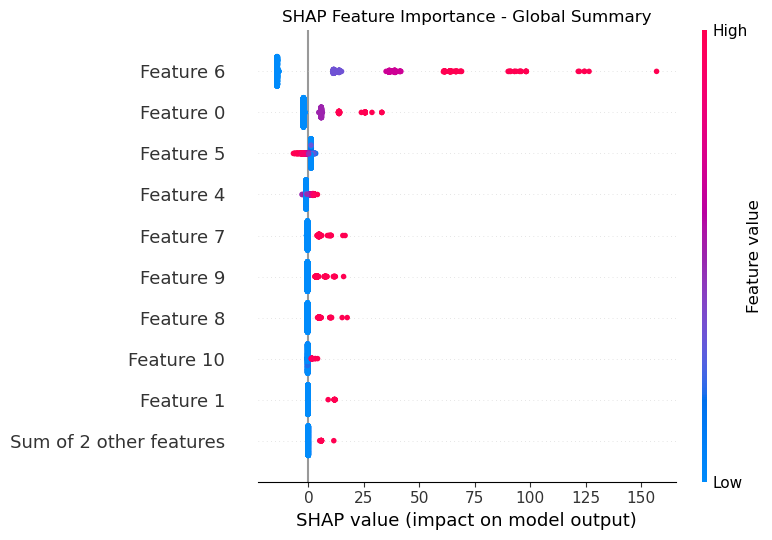

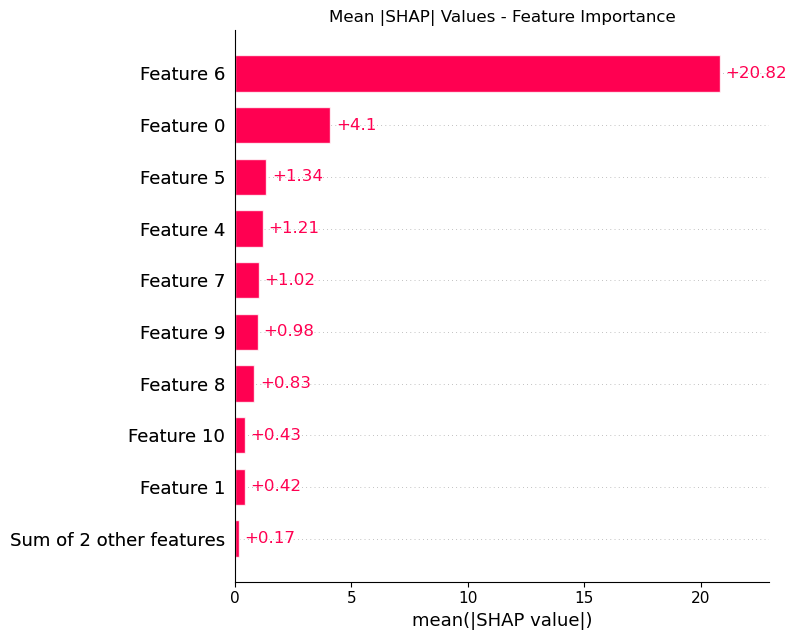

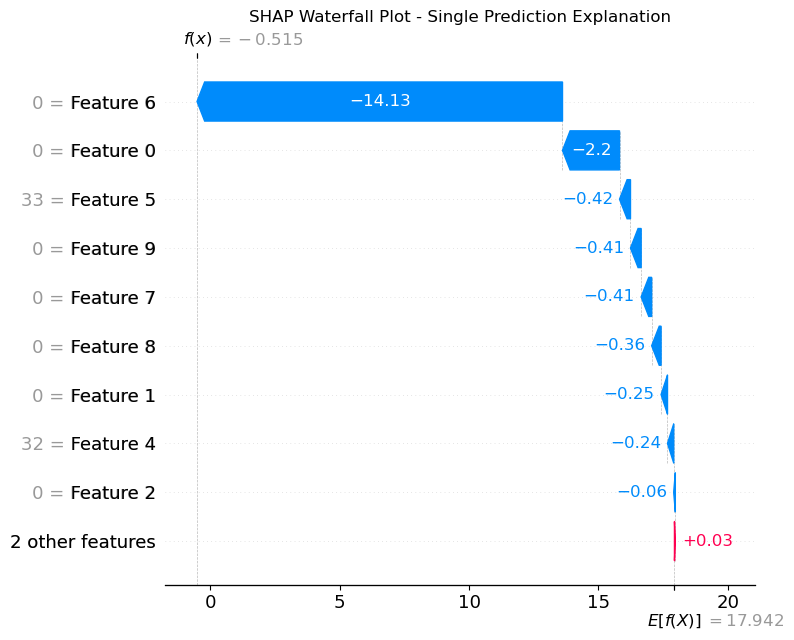

<Figure size 1200x300 with 0 Axes>

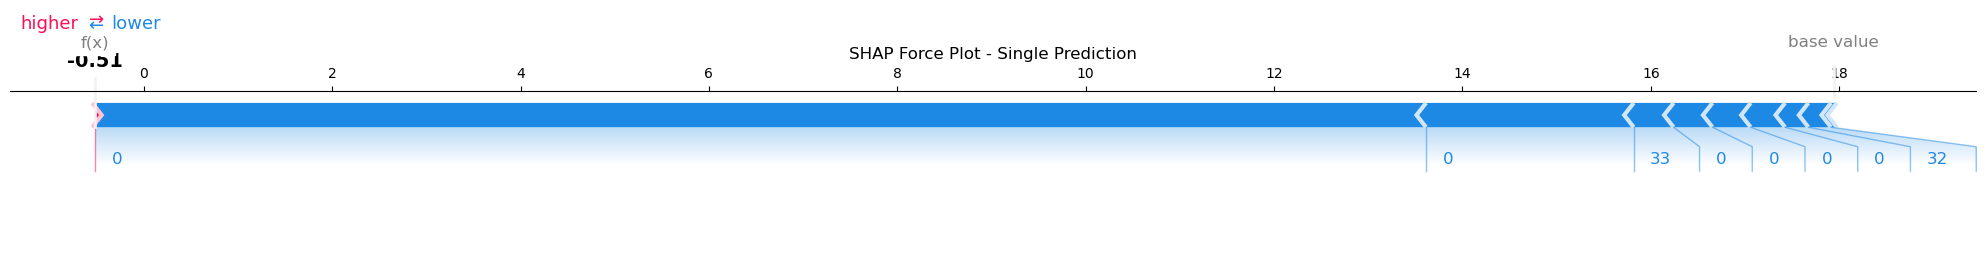

In [28]:
# 1. Global feature importance (beeswarm plot)
plt.figure(figsize=(10, 8))
shap.plots.beeswarm(shap_values, show=False)
plt.title('SHAP Feature Importance - Global Summary')
plt.tight_layout()
plt.show()

# 2. Mean absolute SHAP values (bar plot)
plt.figure(figsize=(10, 6))
shap.plots.bar(shap_values, show=False)
plt.title('Mean |SHAP| Values - Feature Importance')
plt.tight_layout()
plt.show()

# 3. Waterfall plot for first prediction
plt.figure(figsize=(12, 8))
shap.plots.waterfall(shap_values[0], show=False)
plt.title('SHAP Waterfall Plot - Single Prediction Explanation')
plt.tight_layout()
plt.show()

# 4. Force plot for first prediction (as matplotlib)
plt.figure(figsize=(12, 3))
shap.plots.force(shap_values[0], matplotlib=True, show=False)
plt.title('SHAP Force Plot - Single Prediction')
plt.tight_layout()
plt.show()